/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-package

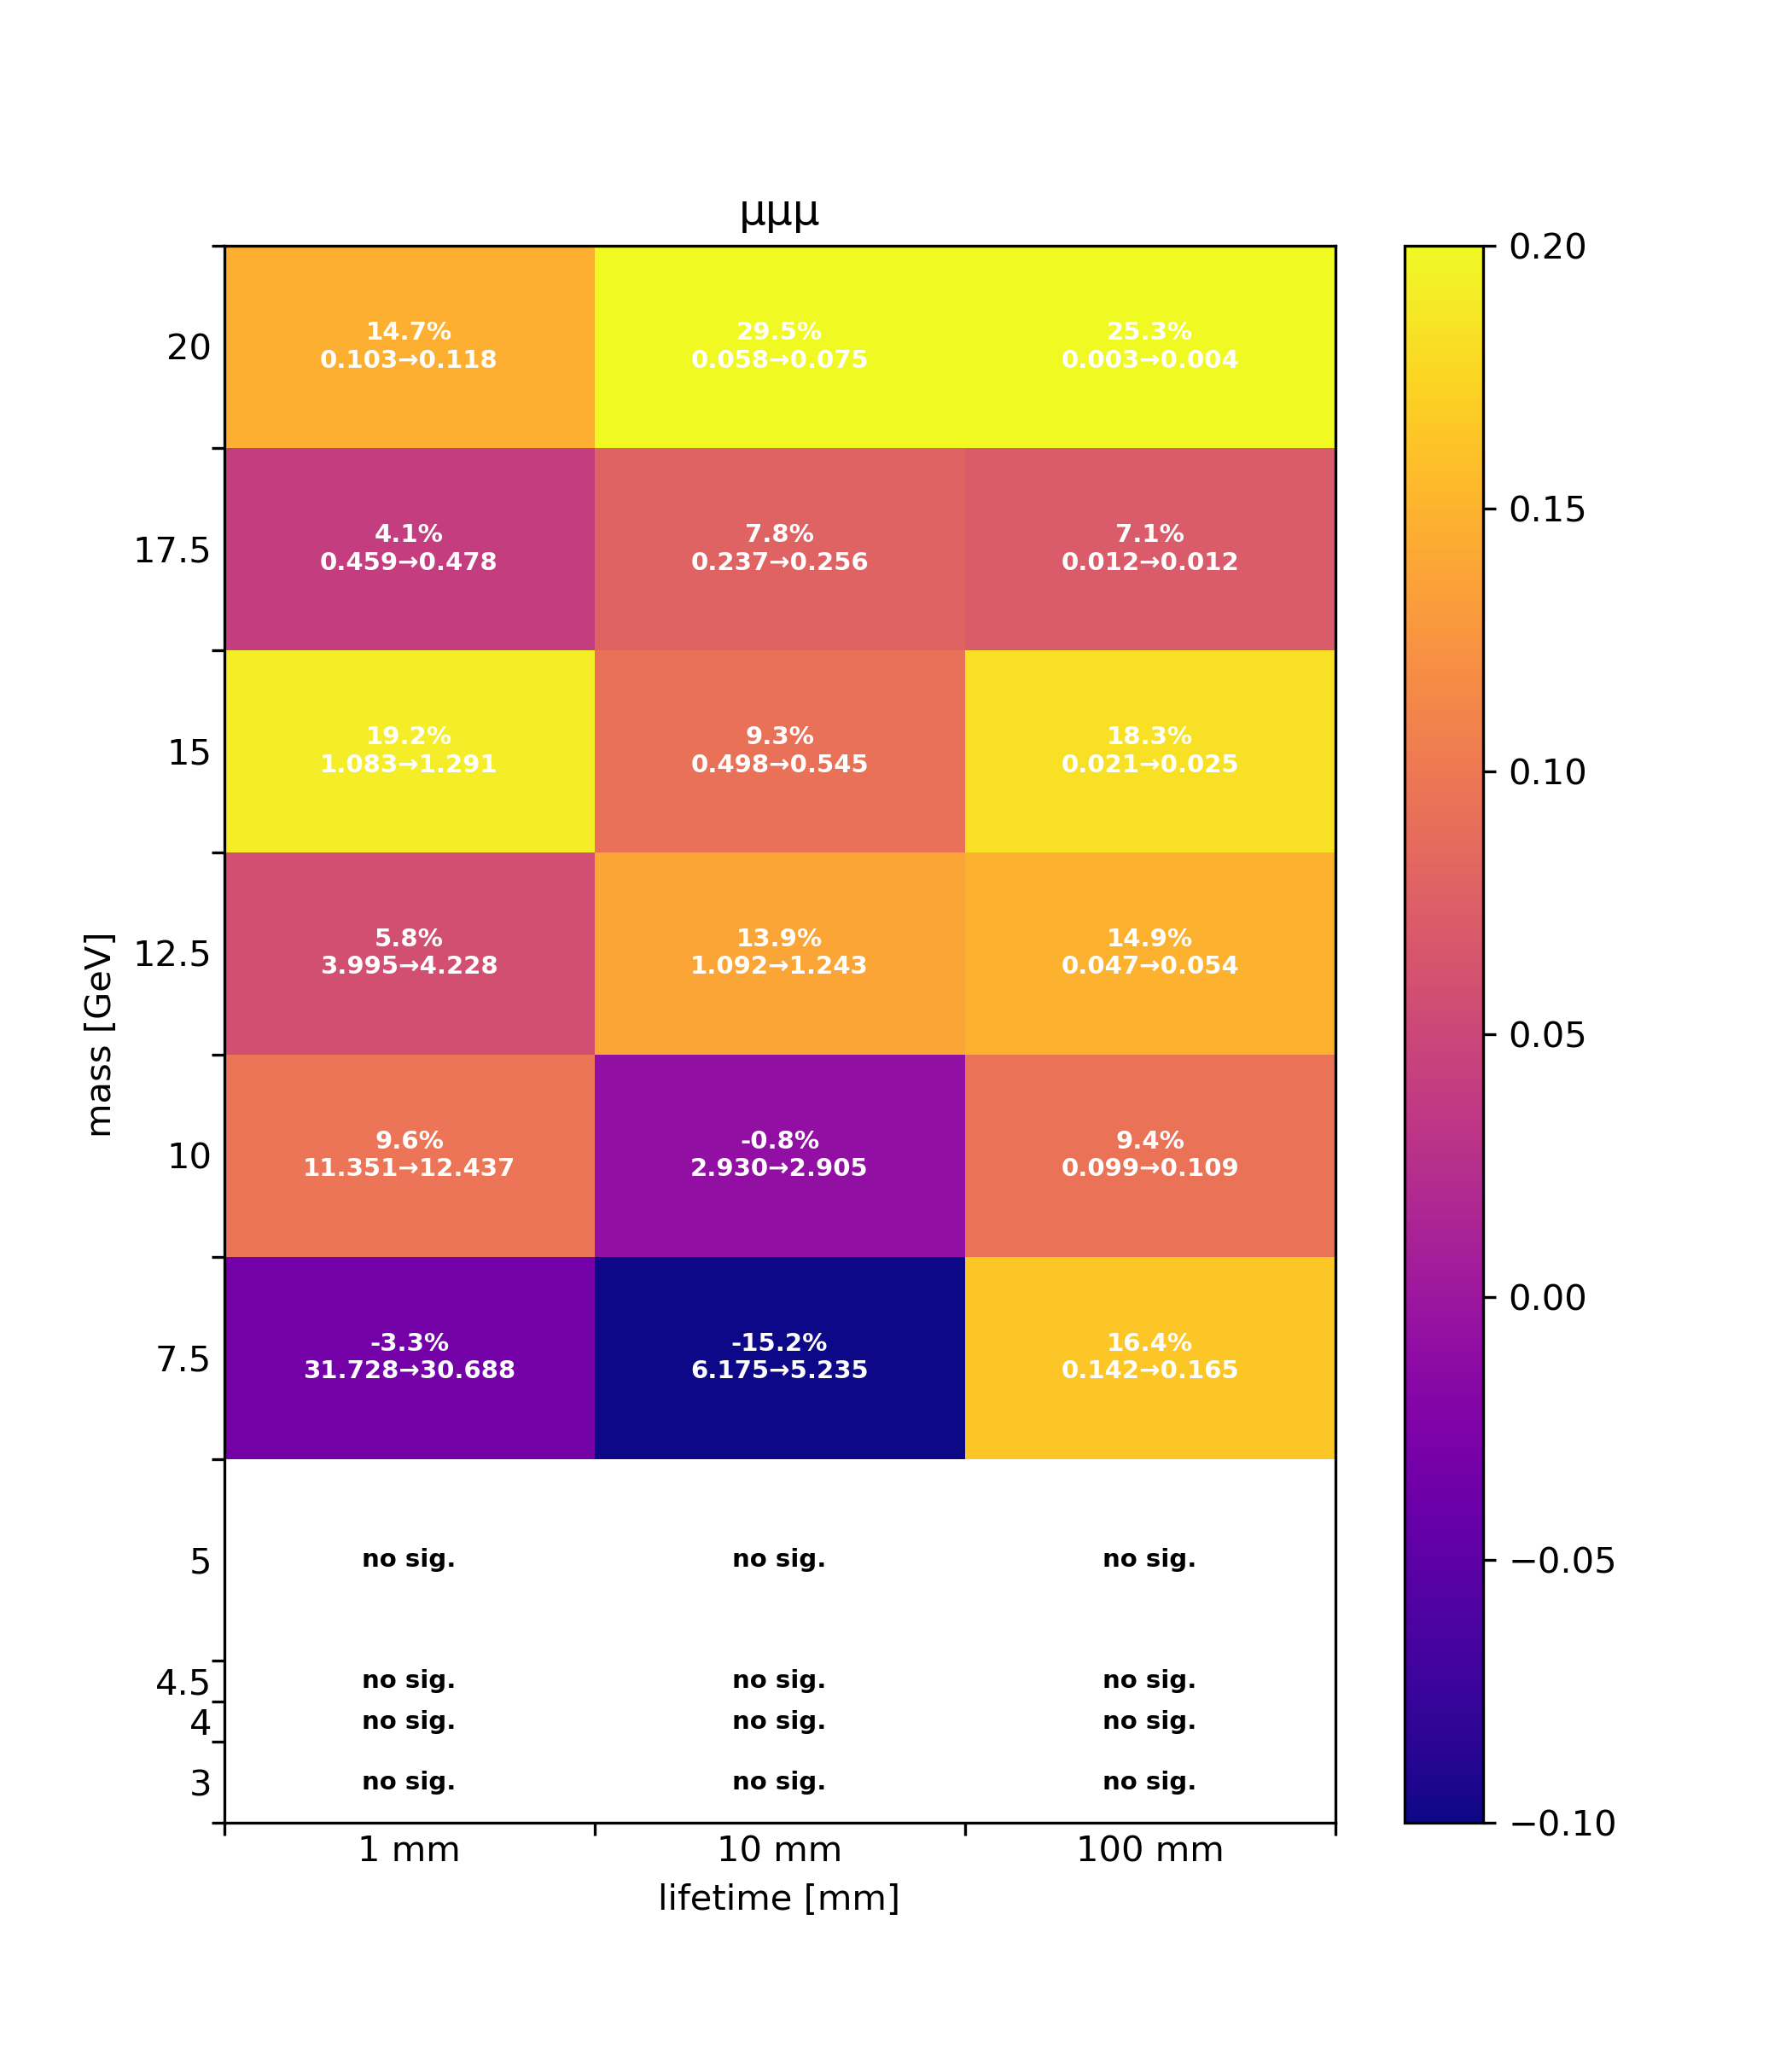

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator


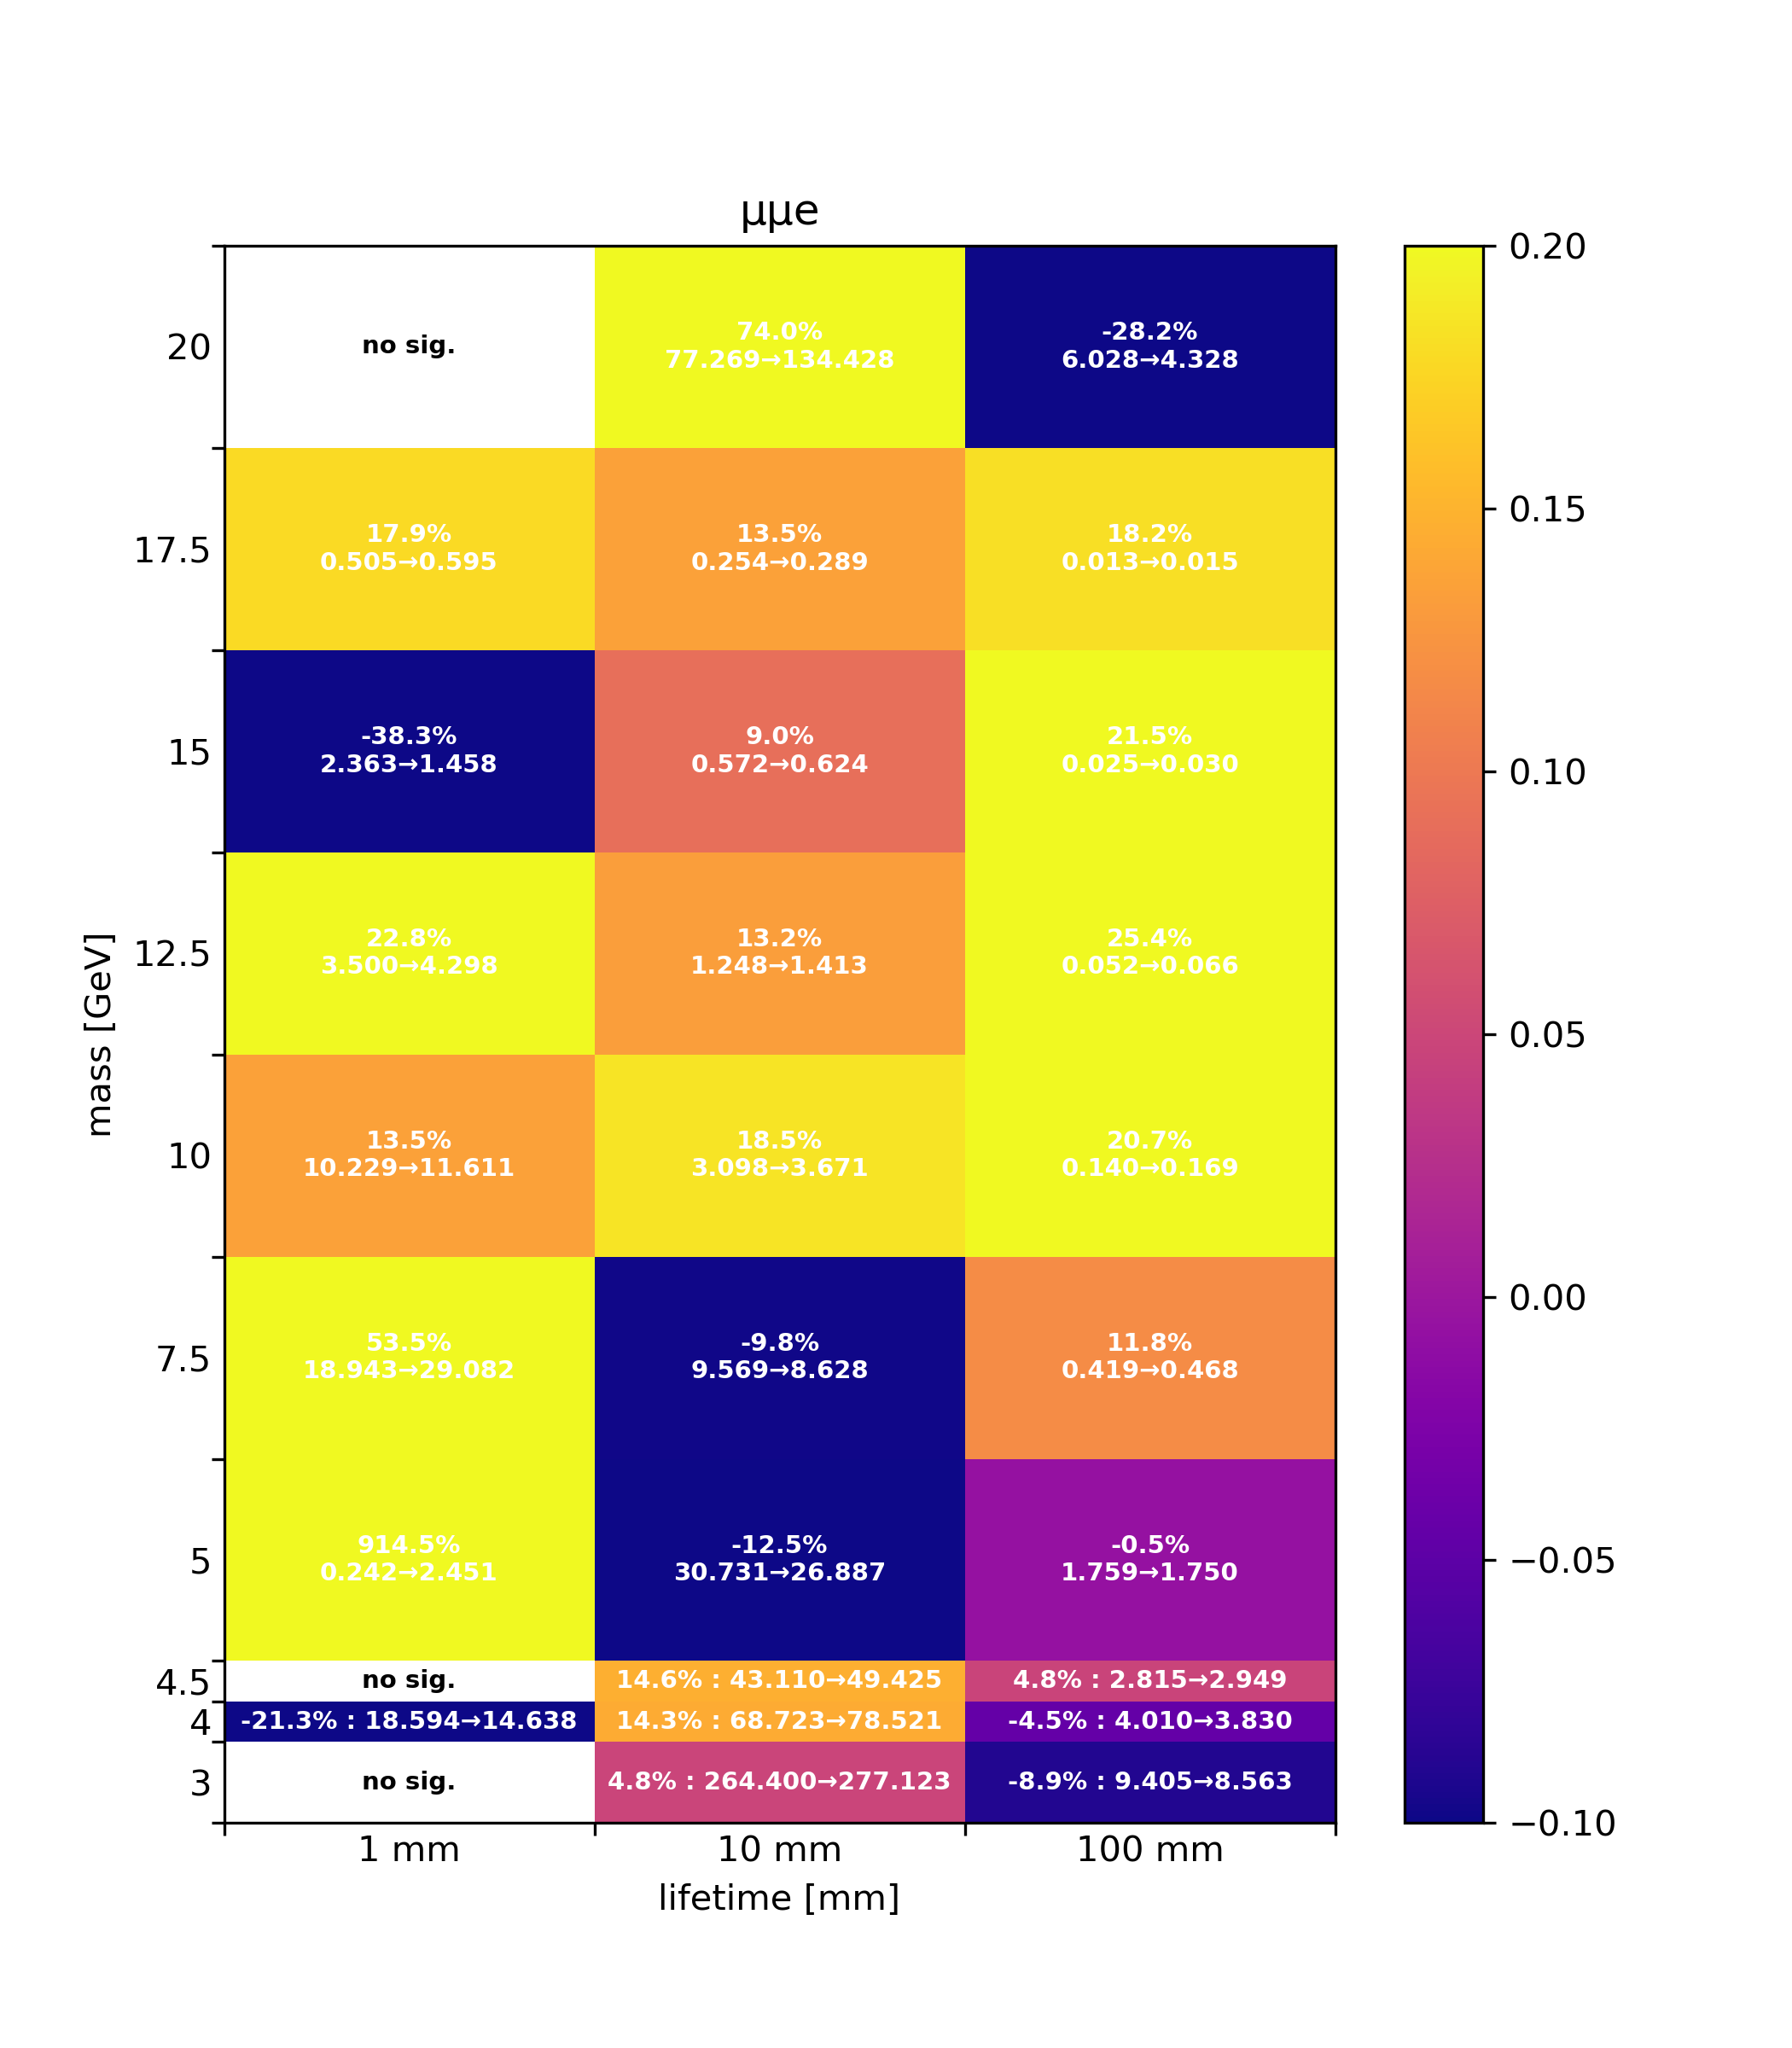

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator


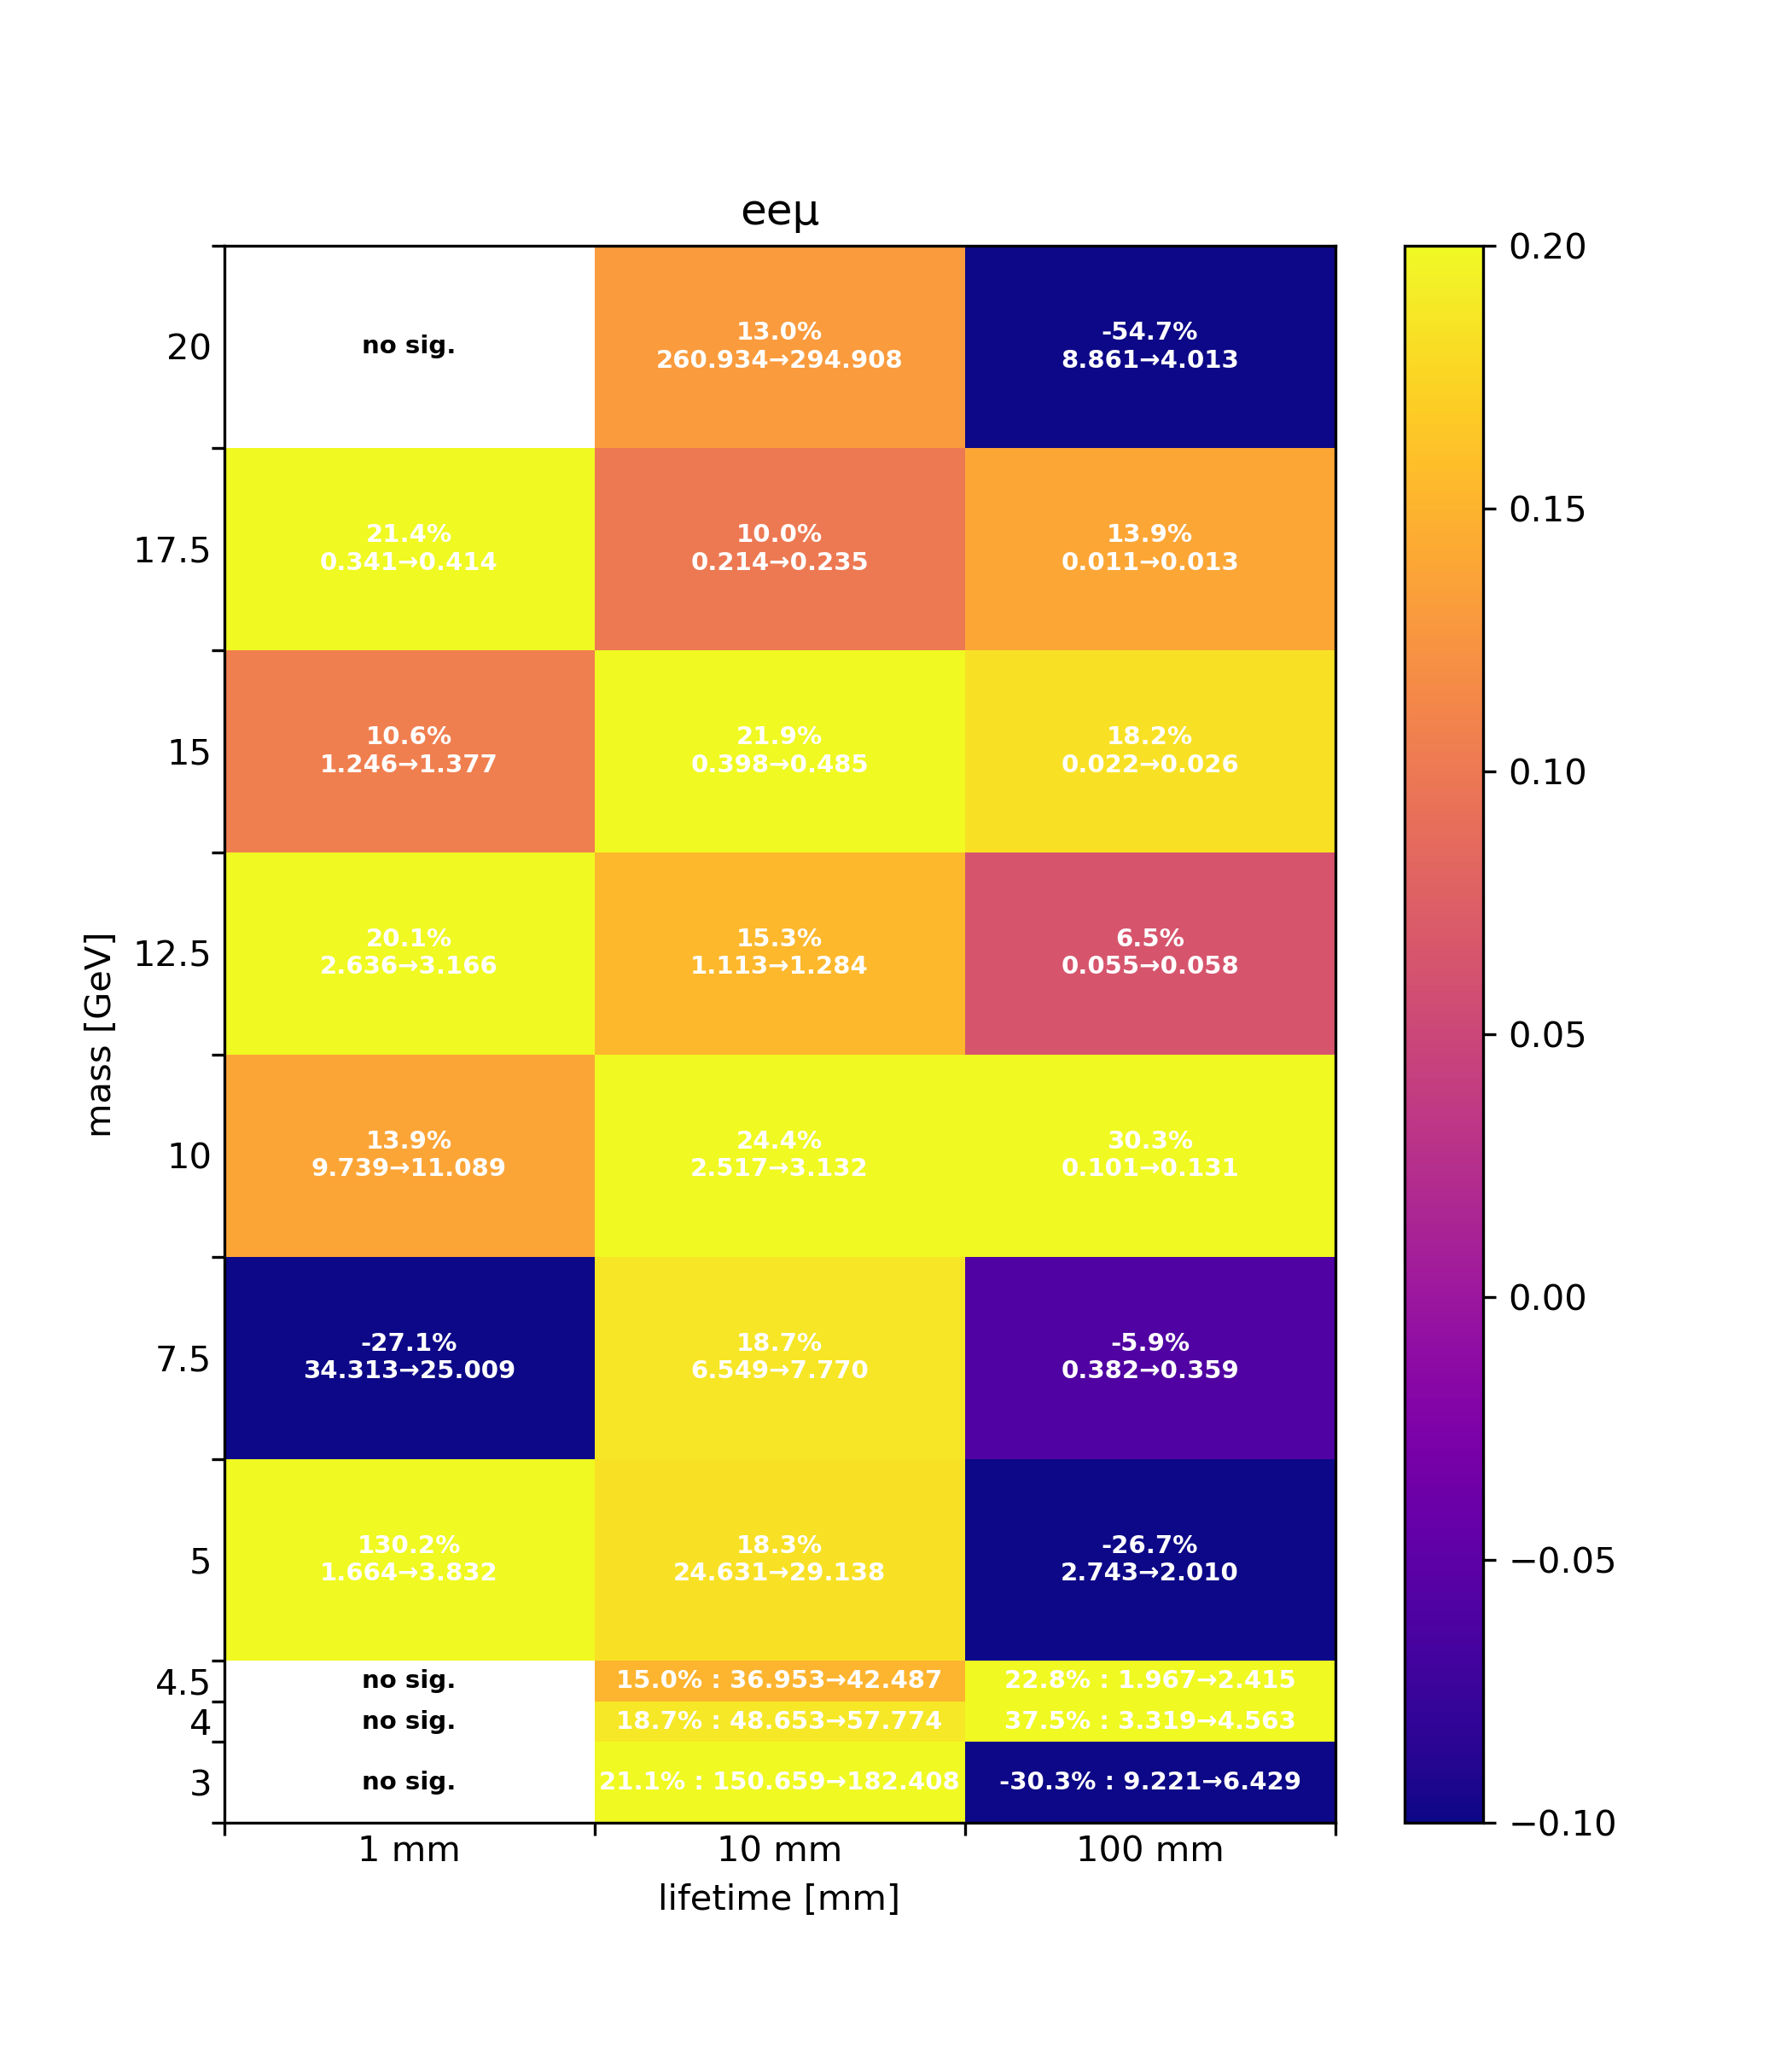

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator


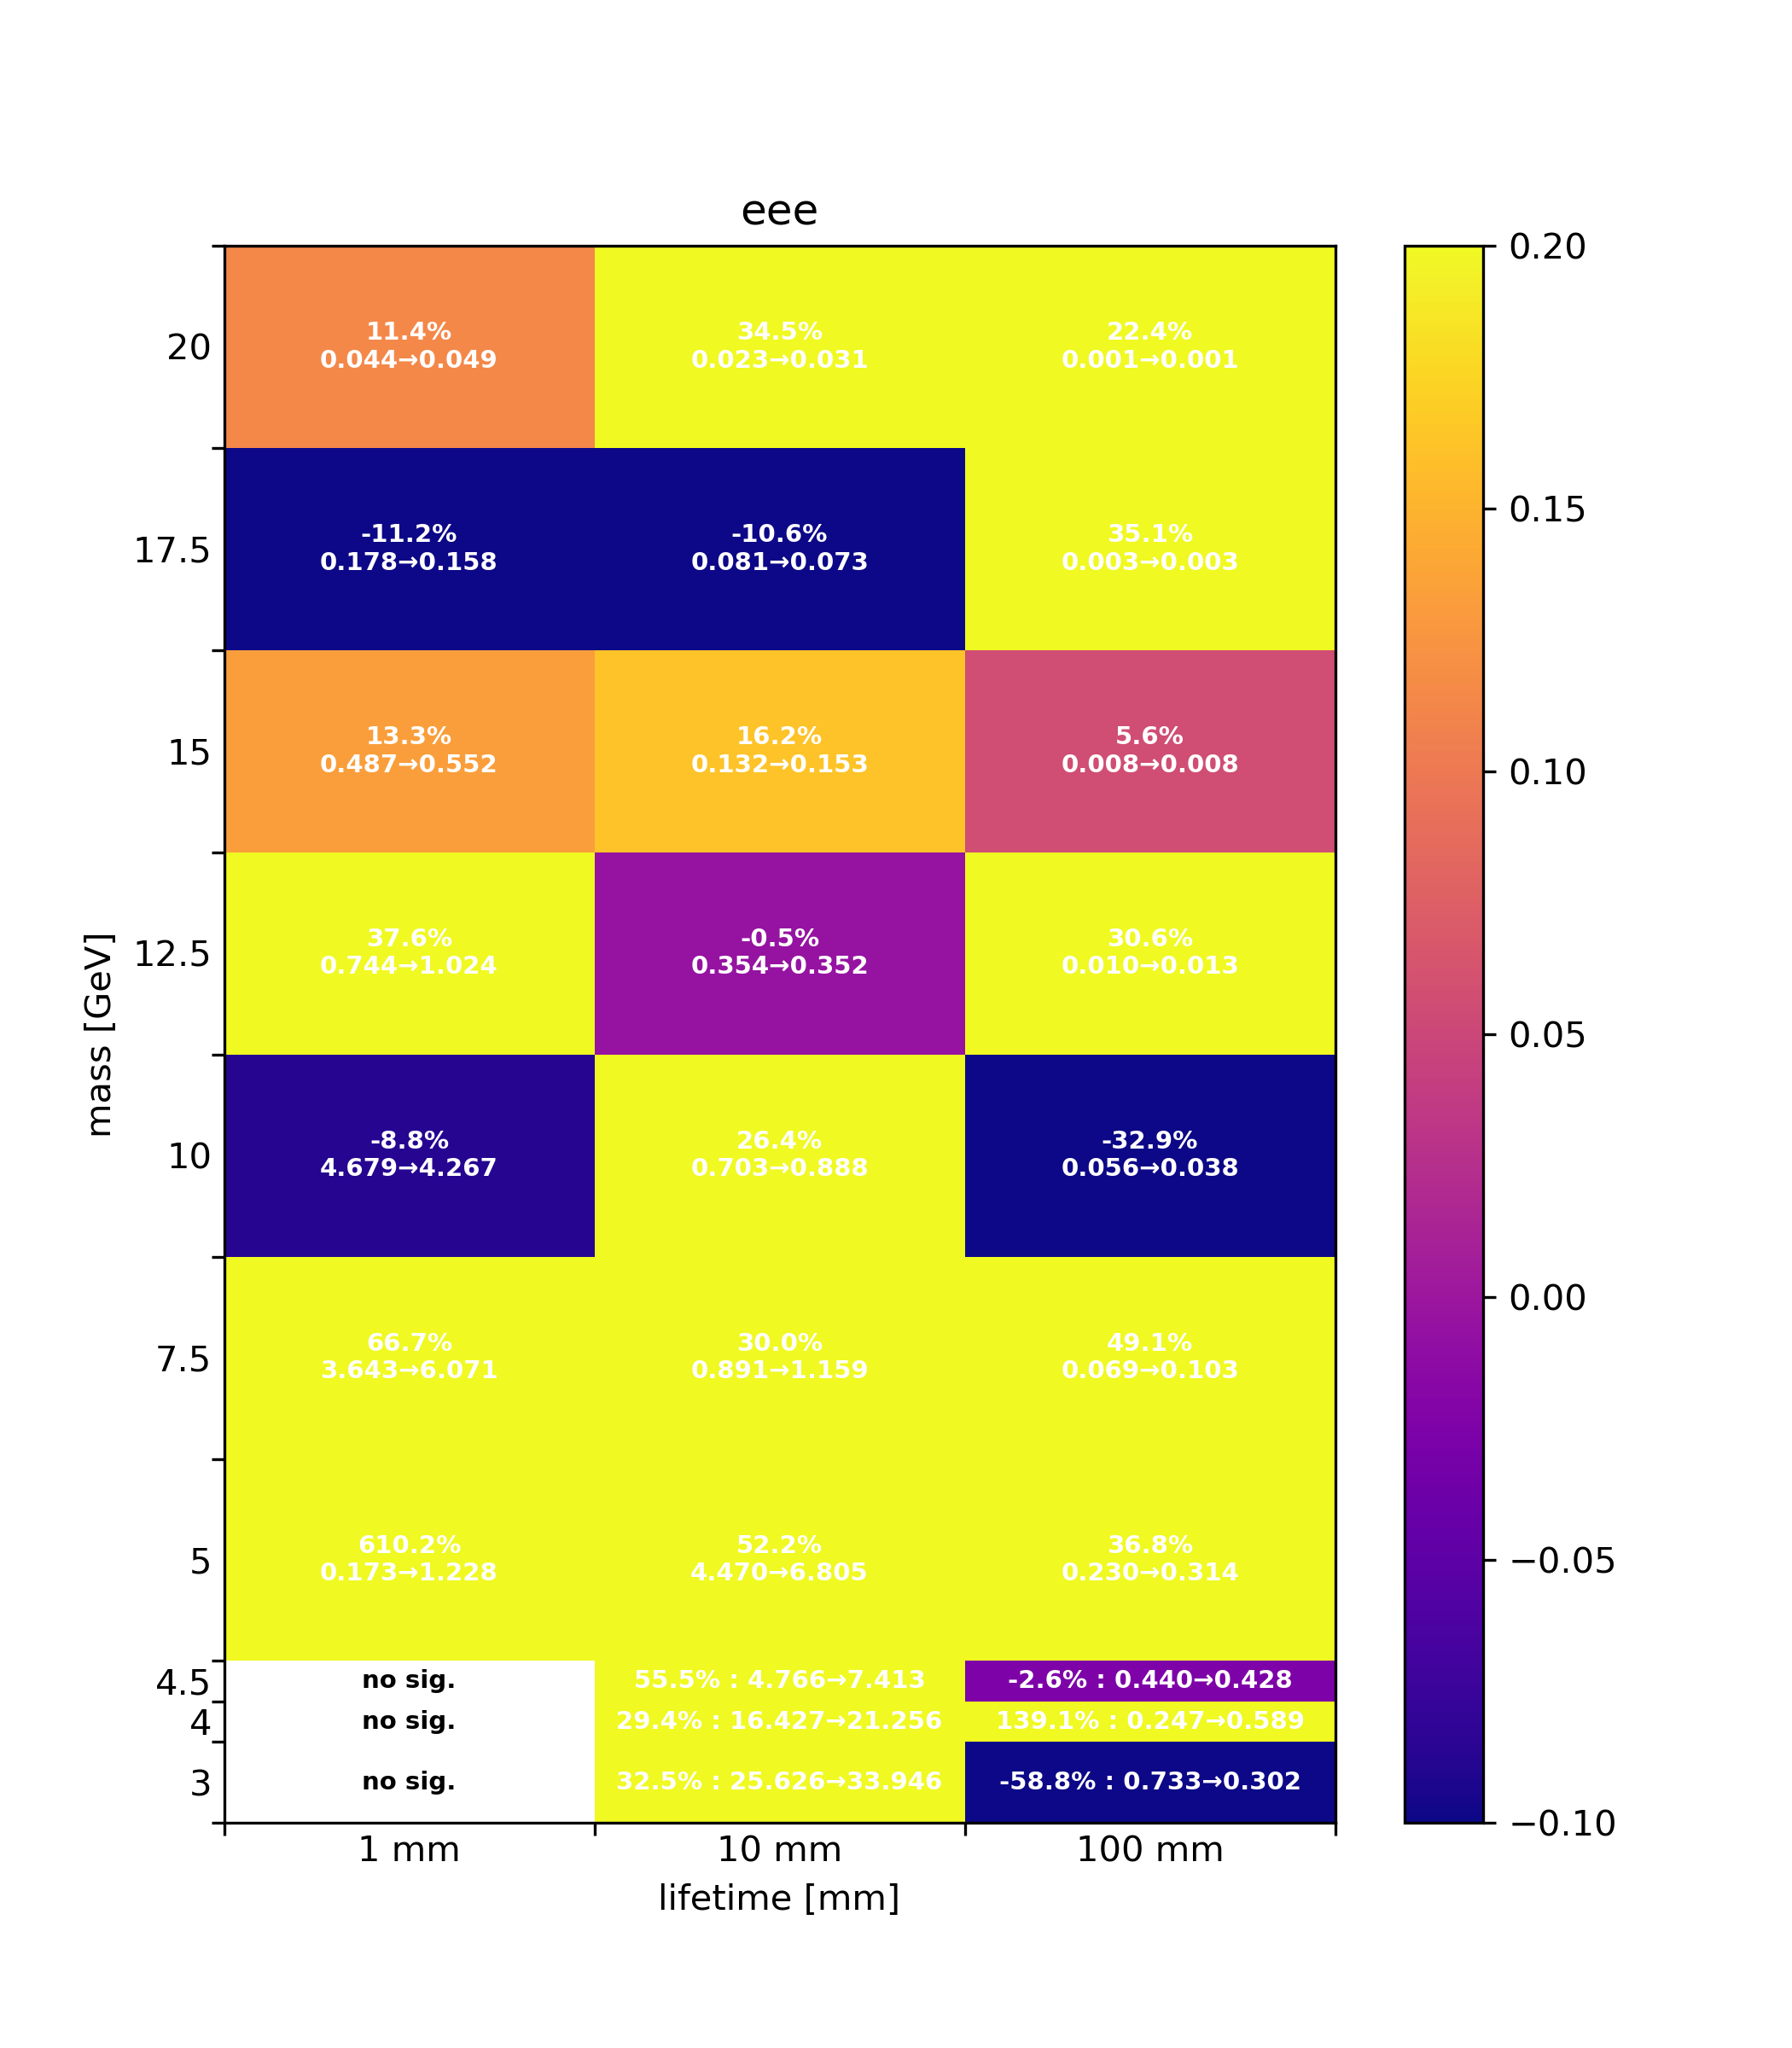

In [32]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image


masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}

text_options = {
    'ha' : 'center',
    'va' : 'center',
    'fontweight' : 'bold',
    'fontsize': 7,
}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_uncertainty_plot(histpath, title, outfile):

    count_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    count_arr_1 = np.array(count_arr)
    count_arr_2 = np.array(count_arr)
    diff_arr = np.array(count_arr)

    # get bins from ntuples    
    for hist_file in glob.glob(f'{indir_1}{histpath}'):
        try:
            f_fullrun2_1 = uproot.open(hist_file)
            f_fullrun2_2 = uproot.open(hist_file.replace(indir_1, indir_2))
        except Exception as e: 
            print(e)

        count_1 = -100
        count_2 = -100
        try:
            if weighted: count_1 = f_fullrun2_1['nominal/VSI_LeptonsMod/CutFlow/CutFlow_weighted_one_hnl_dirac'].pandas()[1:-1].iloc[-3]['count']
            else: count_1 = len(f_fullrun2_1['nominal_VSI_LeptonsMod_ntuples_LNC_plus_LNV_mHNL']['HNLm'])
        except: pass
        try:
            if weighted: count_2 = f_fullrun2_2['nominal/VSI_LeptonsMod/CutFlow/CutFlow_weighted_one_hnl_dirac'].pandas()[1:-1].iloc[-3]['count']
            else: count_2 = len(f_fullrun2_2['nominal_VSI_LeptonsMod_ntuples_LNC_plus_LNV_mHNL']['HNLm'])
        except Exception as e: 
            # print(e)
            pass

        tokens = hist_file.split('histograms_fullrun2_')[1].split('_')
        file_mass = float(tokens[0][:-1].replace('p','.'))
        file_lifetime = int(tokens[1].split('mm')[0])

        set_bin_content(file_mass, file_lifetime, count_1, count_arr_1)
        set_bin_content(file_mass, file_lifetime, count_2, count_arr_2)

        diff = np.nan
        if count_2 >= 0:
            diff = (count_2-count_1)/count_1
        set_bin_content(file_mass, file_lifetime, diff, diff_arr)

    # do the plotting
    plot_uncertainties(count_arr_1, count_arr_2, diff_arr, title, outfile)
    return count_arr_1, count_arr_2, diff_arr

def plot_uncertainties(count_arr_1, count_arr_2, diff_arr, title, outfile):
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, diff_arr, vmin=-.1, vmax=.2, cmap='plasma') # <<<<<<<<<<<<
    plt.colorbar()
    ax = plt.gca()

    # mess with x ticks
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels('')
    ax.set_xticklabels(['1 mm', '10 mm', '100 mm',], minor=True)
    ax.set_xticks([0.5,1.5,2.5,], minor=True)
    ax.tick_params(axis='both', which='minor', length=0)

    # mess with y ticks
    ax.set_yticks(masses)
    ax.set_yticklabels('')
    ax.tick_params(which='minor', length=0)
    ax.set_yticks(masses[:-1] + np.diff(masses)/2, minor=True)
    ax.set_yticklabels(masses[:-1], minor=True)

    ax.set_title(title)
    ax.set_xlabel('lifetime [mm]')
    ax.set_ylabel('mass [GeV]')

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2
            if not np.isnan(diff_arr[i,j]):
                delim = '\n' if masses[i] >= 5 else ' : '
                if weighted: text = f'{diff_arr[i,j]:0.1%}{delim}{count_arr_1[i,j]:0.3f}→{count_arr_2[i,j]:0.3f}' 
                else: text = f'{diff_arr[i,j]:0.1%}{delim}{count_arr_1[i,j]:0.0f}→{count_arr_2[i,j]:0.0f}' 
                ax.text(yloc, xloc , text, color='white', transform=ax.transData, **text_options)
            else:
                text = 'no sig.'
                ax.text(yloc, xloc , text, color="black", transform=ax.transData, **text_options)

    os.makedirs(outdir, exist_ok=True)
    plt.savefig(outdir+outfile+'.png', dpi=300)
    plt.savefig(outdir+outfile+'.pdf', dpi=300)

weighted = True
indir_1 = '/data/hnl/histograms/v9p1_histograms/'
indir_2 = '/data/hnl/histograms/v9p2_histograms/'
outdir = '/home/newhouse/public/Analysis/HNL/dhnlanalysisnotebooks/ntuple_comparison/weighting_off_plots/'

make_uncertainty_plot(histpath=f'histograms_fullrun2_*_uuu.root', title='μμμ', outfile='compare_uuu')
display(Image(filename=f'{outdir}compare_uuu.png'));

make_uncertainty_plot(histpath='histograms_fullrun2_*_uue.root', title='μμe', outfile='compare_uue')
display(Image(filename=f'{outdir}compare_uue.png'));

make_uncertainty_plot(histpath='histograms_fullrun2_*_eeu.root', title='eeμ', outfile='compare_eeu')
display(Image(filename=f'{outdir}compare_eeu.png'));

make_uncertainty_plot(histpath='histograms_fullrun2_*_eee.root', title='eee', outfile='compare_eee')
display(Image(filename=f'{outdir}compare_eee.png'));



In [ ]:
for f in glob.glob('/data/hnl/histograms/v9p2_histograms/histograms_fullrun2_*_uuu.root'):
    print(f)
# f = uproot.open('/data/hnl/histograms/v9p1_histograms/histograms_fullrun2_10G_10mm_uuu.root')
# f.keys()

In [24]:
import uproot
uproot.open('/data/hnl/histograms/v9p1_histograms/histograms_mc16d_uue_2p5G_10mm.root')['nominal']['VSI_LeptonsMod']['CutFlow'].keys()

[b'CutFlow;1',
 b'CutFlow_LNC_raw_counts;1',
 b'CutFlow_LNV_raw_counts;1',
 b'CutFlow_weighted_one_hnl_majorana;1',
 b'CutFlow_weighted_one_hnl_majorana_LNV_only;1',
 b'CutFlow_weighted_one_hnl_majorana_LNC_only;1',
 b'CutFlow_weighted_one_hnl_dirac;1',
 b'CutFlow_weighted_majorana_limit_ih;1',
 b'CutFlow_weighted_majorana_limit_nh;1',
 b'CutFlow_weighted_dirac_limit_ih;1',
 b'CutFlow_weighted_dirac_limit_nh;1']

In [ ]:
import uproot
f = uproot.open('/data/newhouse/HNL/EXOT29/mc16_13TeV.312990.Pythia8EvtGen_A14NNPDF23LO_WelHNL50_10G_lt10dd_emu.deriv.DAOD_EXOT29.e7902_e5984_a875_r11891_r11748_p4482/DAOD_EXOT29.24948377._000011.pool.root.1')
f['MetaData'].keys()

In [ ]:
f['MetaData'].arrays('FileMetaDataAuxDyn*')

In [ ]:


import ROOT
c = ROOT.TCanvas()
channel = 'uuu'
files = {
    'uuu': 'histograms_fullrun2_12p5G_10mm_uuu',
    'uue': 'histograms_fullrun2_12p5G_10mm_uue',
    'eeu': 'histograms_fullrun2_12p5G_10mm_eeu',
    'eee': 'histograms_fullrun2_12p5G_10mm_eee',
}
cuts = {
    'uuu': 'DV_weight_LNC_only*(DV_2medium > 0 && DV_cosmic_sep > 0.05 && DV_mass > 5.5 && DV_pass_lep_pt > 0 && ((mll_dMu_plep_is_OS == 1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100)) || mll_dMu_plep_is_SS == 1 ) && mvis > 40 && mvis < 90 && n_trigger_matched_medium > 0)',
    'uue': 'DV_weight_LNC_only*(DV_medium_veryveryloose > 0 && DV_cosmic_sep > 0.05 && (((DV_mass > 2 && DV_mass < 5.5) && DV_mass > -(7/150)*DV_r + 7 ) || DV_mass > 5.5) && DV_pass_lep_pt > 0 && ((mll_dMu_plep_is_OS ==1 && (mll_dMu_plep < 80 || mll_dMu_plep > 100))|| mll_dMu_plep_is_SS ==1) && mvis > 40 && mvis < 90 && n_trigger_matched_medium > 0)',
    'eeu': 'DV_weight_LNC_only*(DV_medium_veryveryloose > 0 && DV_cosmic_sep > 0.05 && (((DV_mass > 2 && DV_mass < 5.5) && DV_mass > -(7/150)*DV_r + 7 ) || DV_mass > 5.5) && DV_pass_lep_pt > 0 && ((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100))|| mll_dEl_plep_is_SS ==1) && mvis > 40 && mvis < 90 && n_trigger_matched_medium > 0)',
    'eee': 'DV_weight_LNC_only*(DV_2veryveryloose > 0 && DV_cosmic_sep > 0.05 && (((DV_mass > 2 && DV_mass < 5.5) && DV_mass > -(7/150)*DV_r + 7 ) || DV_mass > 5.5) && DV_pass_lep_pt > 0 && ((mll_dEl_plep_is_OS ==1 && (mll_dEl_plep < 80 || mll_dEl_plep > 100)) || mll_dEl_plep_is_SS==1) && mvis > 40 && mvis < 90 && DV_pass_mat_veto > 0 && n_trigger_matched_medium > 0)',
}
# 8.3 ntuples
rootf_8p3 = ROOT.TFile(f'/data/hnl/histograms/v8p4_histograms/{files[channel]}.root')
ntuples_8p3 = rootf_8p3.Get('ntuples_LNC_DVtype_VSI_LeptonsMod')
ntuples_8p3.Draw('HNLm >> hist1(40,0,20)',
cuts[channel],
'hist')
hist1 = ROOT.gDirectory.Get("hist1")
hist1.SetLineColor(ROOT.kBlue)
hist1.SetLineWidth(4)
hist1.SetStats(0)
hist1.SetXTitle('HNL Mass [GeV]')
hist1.SetYTitle('Events')
hist1.SetTitle(f'Channel: {files[channel]}')

# 8.6 ntuples
rootf_8p6 = ROOT.TFile(f'/data/hnl/histograms/v8p6_histograms/{files[channel]}.root')
ntuples_8p6 = rootf_8p6.Get('ntuples_LNC_mHNL_VSI_LeptonsMod')
ntuples_8p6.Draw('HNLm >> hist2(40,0,20)',
'DV_weight_LNC_only',
'same hist')

hist2 = ROOT.gDirectory.Get("hist2")
hist2.SetLineColor(ROOT.kRed)
hist2.SetLineWidth(2)

print('no SF', hist1.Integral())
print('with SF', hist2.Integral())

legend = ROOT.TLegend(0.1,0.7,0.5,0.9)
legend.AddEntry(hist1, f'8p3, no SF  : {hist1.Integral():0.4f}')
legend.AddEntry(hist2, f'8p1, with SF : {hist2.Integral():0.4f}')
legend.Draw()

c.Draw()
c.SaveAs(f'{channel}.pdf')